In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# (신규) 예제에서 사용할 데이터셋을 다운로드 받기 위한 함수
from tensorflow.keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


### 데이터 전처리

In [3]:
# 결측치 등의 데이터 이상점이 없는 예제 데이터 이므로 생략

### EDA

In [4]:
# 훈련 데이터의 형태 확인

print(x_train.shape, y_train.shape)
print(y_train)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


In [5]:
# 검증 데이터의 형태 확인

print(x_test.shape, y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [6]:
# 임의의 샘플 값 확인

for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000051159253159050000000000000000000000000
000000000000000000000000000000000000000000048238252252252237000000000000000000000000
000000000000000000000000000000000000000054227253252239233252057006000000000000000000
000000000000000000000000000000000010060224252253252202084252253122000000000000000000
000000000000000000000000000000000163252252252253252252096189253167000000000000000000
000000000000000000000000000000051238253253190114253228047079255168000000000000000000
000000000000000000000000000048238252252179012075121021000000253243050000000000000000
00000000000000000000000003816525323320808400000000000000000025325

In [7]:
# 샘플에 대한 y_train 값 확인

print(y_train[1])

0


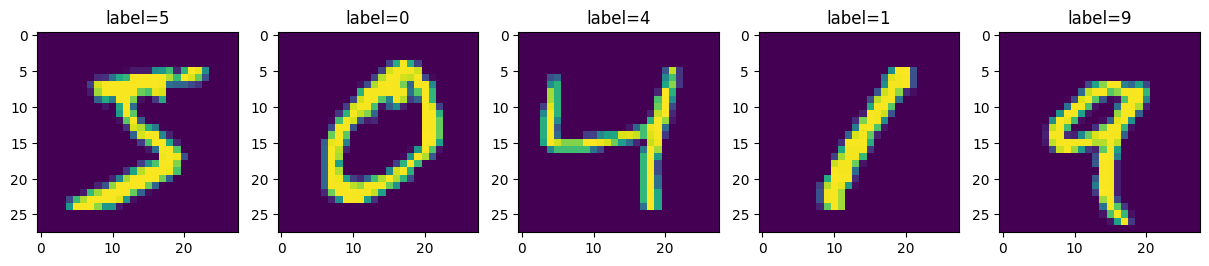

In [8]:
# 데이터 그려보기

#mnist 데이터셋은 0~9까지 가로 28px, 세로 28px 크기의 이미지 60000장 + 10000장 데이터.
#글자를 표현하는 간단한 이미지이므로 배경색을 단색으로 처리하고 글자가 표시되는 영역의 색상을 노란색으로 표현.
#색상값은 0~255 사이의 10진 정수.
#그러므로 이미지 데이터들은 이미지 픽셀 크기 만큼의 2차 배열의 각 원소가 색상값을 의미하는 숫자로 구성된 데이터로 표현가능.


fig, ax = plt.subplots(1, 5, figsize=(15, 3), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%d" % label)

plt.savefig('mnist1.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

#### 데이터셋 분할하기

In [9]:
# 랜덤시드 고정

np.random.seed(777)

In [10]:
# 훈련데이터와 레이블 구분하기는 처음부터 데이터셋이 구분되어 있었으므로 생략

In [11]:
# 훈련데이터와 검증 데이터로 분할은 처음부터 데이터 셋이 구분되어 있었으므로 생략

In [12]:
# 레이블에 대한 one_hot_encodig

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
# 훈련, 검증용 독립변수(이미지)의 차수 재설정

x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_reshape = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(f'훈련 데이터 {x_train_reshape.shape} / 검증 데이터 {x_train_reshape.shape}')
print(x_train_reshape[0])

훈련 데이터 (60000, 784) / 검증 데이터 (60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 

In [14]:
# 이미지 데이터 정규화

x_train_normal = x_train_reshape / 255
x_test_normal = x_test_reshape / 255
x_train_normal[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 모델 개발

In [15]:
# 모델 정의

model = Sequential()
model.add(Dense(256, input_shape=(len(x_train_normal[0]), ), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 학습하기

result = model.fit(x_train_normal, y_train_one_hot, epochs=500, 
            validation_data=(x_test_normal, y_test_one_hot), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)])

result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2129 - acc: 0.9353 - val_loss: 0.1101 - val_acc: 0.9669
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - acc: 0.9725 - val_loss: 0.0865 - val_acc: 0.9738
Epoch 3/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0632 - acc: 0.9808 - val_loss: 0.0825 - val_acc: 0.9765
Epoch 4/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - acc: 0.9845 - val_loss: 0.0829 - val_acc: 0.9735
Epoch 5/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - acc: 0.9870 - val_loss: 0.0859 - val_acc: 0.9766
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0858 - val_acc: 0.9778

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127 - acc: 0.9957 - val_loss:

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.212909,0.935300,0.110123,0.9669,0.001000
2,0.090619,0.972467,0.086501,0.9738,0.001000
3,0.063215,0.980850,0.082461,0.9765,0.001000
4,0.048111,0.984550,0.082869,0.9735,0.001000
5,0.039996,0.986983,0.085901,0.9766,0.001000
6,0.032333,0.989733,0.085802,0.9778,0.001000
7,0.012715,0.995717,0.075106,0.9804,0.000500
8,0.009380,0.997083,0.077382,0.9830,0.000500
9,0.007892,0.997167,0.077013,0.9851,0.000500


#### 학습결과 평가

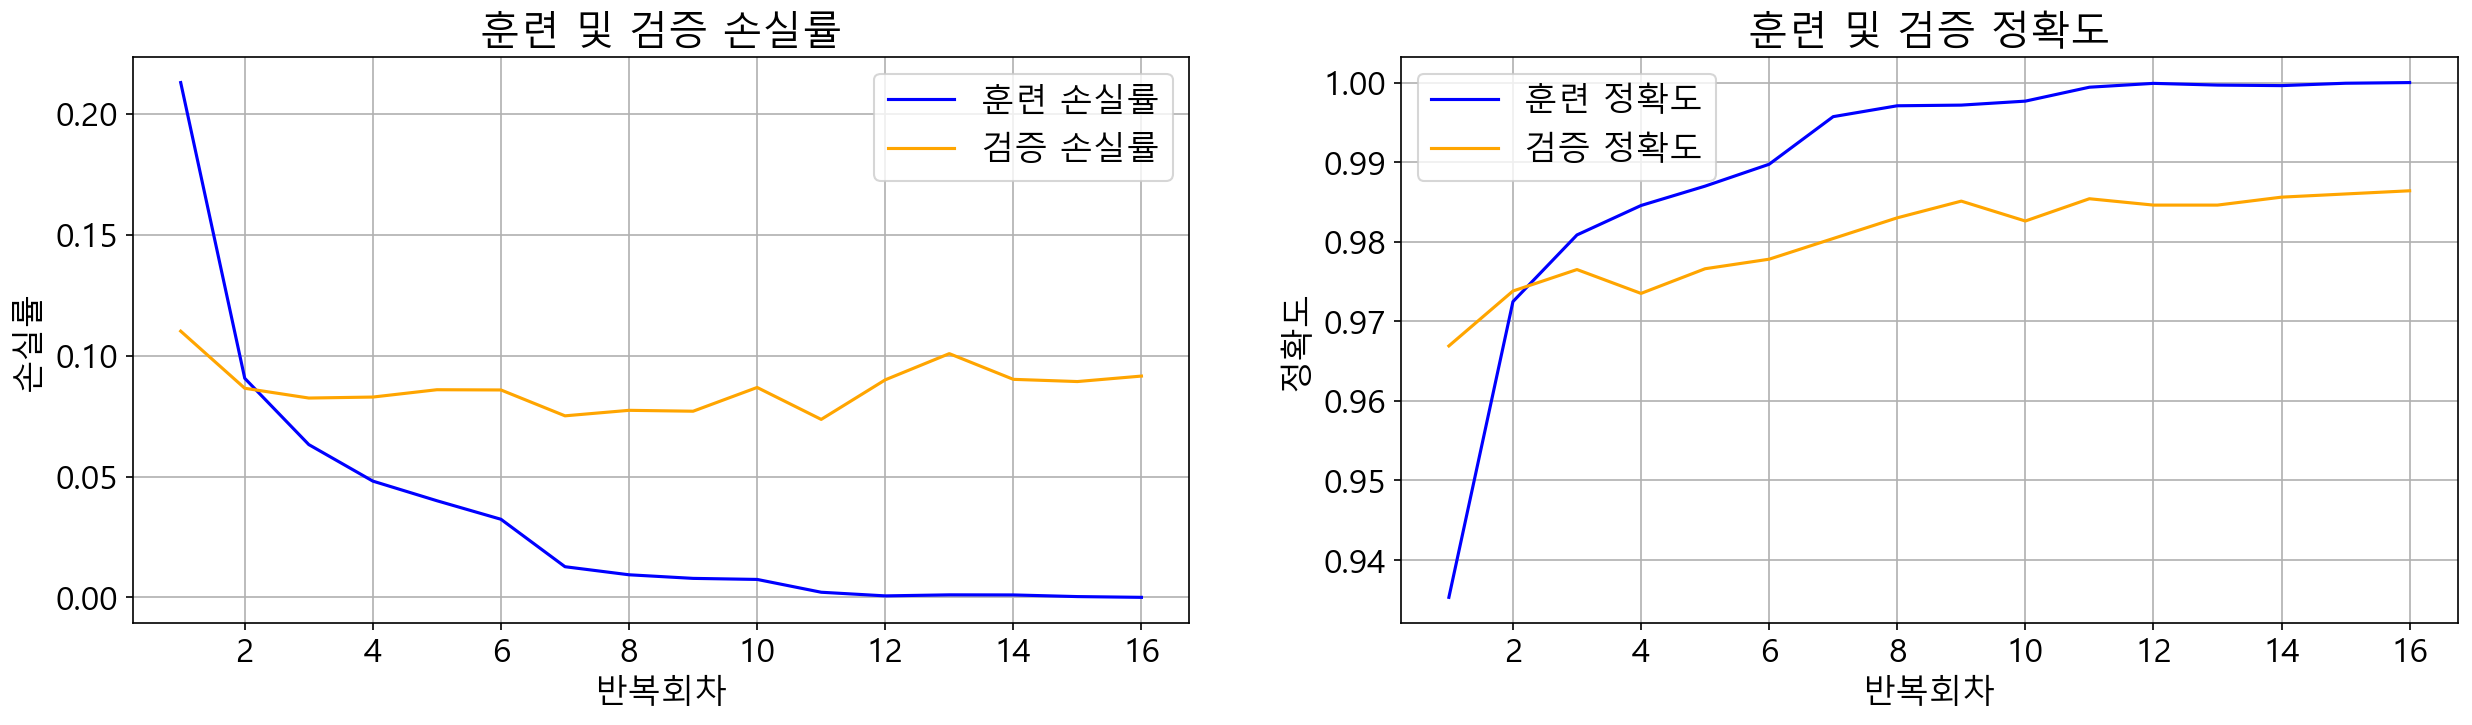

In [17]:
# 학습 결과 시각화

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', 
             label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', 
             label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', 
             label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', 
             label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

In [18]:
# 모델 성능 평가

evaluate = model.evaluate(x_test_normal, y_test_one_hot)
print("최종 손실률: %f, 최종 정확도: %f" % (evaluate[0], evaluate[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.0915 - acc: 0.9864
최종 손실률: 0.091545, 최종 정확도: 0.986400


#### 학습 결과 적용

In [19]:
# 테스트 데이터에 대한 예측 결과 산정

result = model.predict(x_test_normal)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

10000개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([1.5167155e-20, 1.8619342e-16, 1.2683189e-14, 7.0886791e-13,
       3.5261669e-16, 2.2447787e-19, 3.8664809e-22, 1.0000000e+00,
       1.4551542e-20, 2.0754915e-11], dtype=float32)

In [20]:
# 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

arg_result = np.argmax(result, axis=-1)
arg_result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

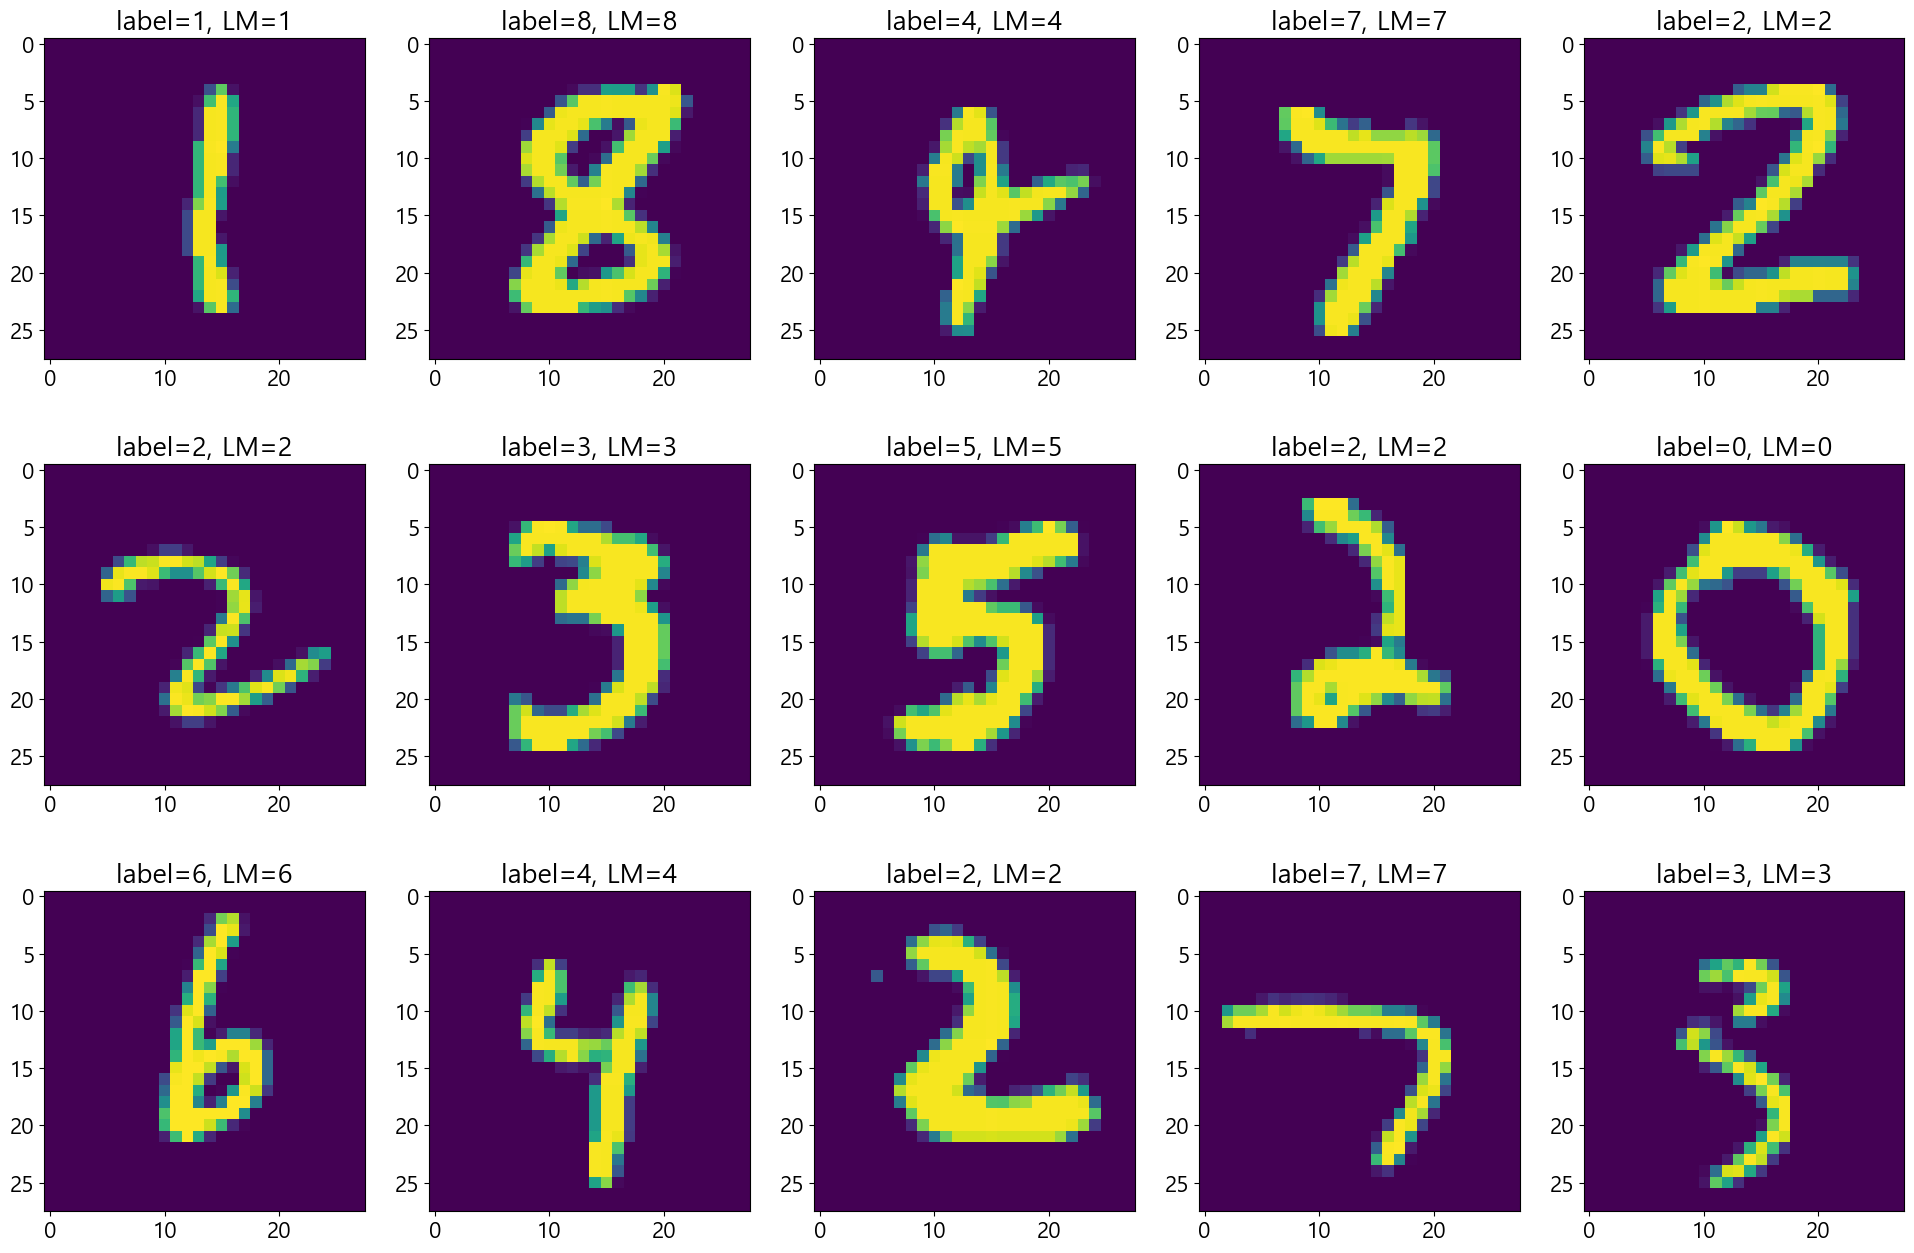

In [21]:
# 데이터 비교

row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col+1)*4, (row+1)*4), dpi=100)

size = row*col
length = len(y_test)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_test[k]
    label = y_test[k]
    ax[i//col][i%col].imshow(train)
    ax[i//col][i%col].set_title("label=%d, LM=%d" % (label, arg_result[k]))
    
plt.show()
plt.close()